In [14]:
import json

data = [json.loads(line) for line in open('Sarcasm_Headlines_Dataset_v2.json', 'r')]
sentences = []
labels = []

for i in data:
    sentences.append(i['headline'])
    labels.append(i['is_sarcastic'])

In [15]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [16]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [18]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [21]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
625/625 - 3s - loss: 0.6386 - accuracy: 0.6500 - val_loss: 0.5020 - val_accuracy: 0.7945
Epoch 2/10
625/625 - 2s - loss: 0.3927 - accuracy: 0.8393 - val_loss: 0.3597 - val_accuracy: 0.8464
Epoch 3/10
625/625 - 3s - loss: 0.2970 - accuracy: 0.8828 - val_loss: 0.3432 - val_accuracy: 0.8472
Epoch 4/10
625/625 - 2s - loss: 0.2486 - accuracy: 0.9010 - val_loss: 0.3309 - val_accuracy: 0.8545
Epoch 5/10
625/625 - 3s - loss: 0.2110 - accuracy: 0.9196 - val_loss: 0.3441 - val_accuracy: 0.8480
Epoch 6/10
625/625 - 3s - loss: 0.1868 - accuracy: 0.9284 - val_loss: 0.3448 - val_accuracy: 0.8530
Epoch 7/10
625/625 - 3s - loss: 0.1661 - accuracy: 0.9385 - val_loss: 0.3661 - val_accuracy: 0.8466
Epoch 8/10
625/625 - 2s - loss: 0.1461 - accuracy: 0.9478 - val_loss: 0.3849 - val_accuracy: 0.8442
Epoch 9/10
625/625 - 2s - loss: 0.1319 - accuracy: 0.9536 - val_loss: 0.4208 - val_accuracy: 0.8358
Epoch 10/10
625/625 - 3s - loss: 0.1180 - accuracy: 0.9580 - val_loss: 0.4317 - val_accuracy: 0.8391

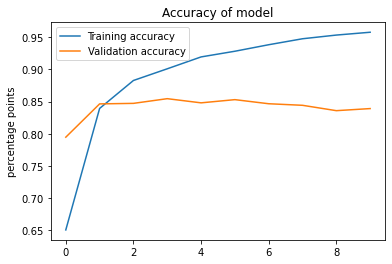

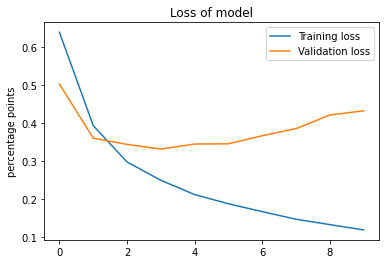

In [26]:
import matplotlib.pyplot as plt

def plot_graphs(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('percentage points')
    plt.title('Accuracy of model')
    plt.legend(['Training accuracy', 'Validation accuracy'])
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('percentage points')
    plt.title('Loss of model')
    plt.legend(['Training loss', 'Validation loss'])
    plt.show()

plot_graphs(history)

* There is a good chance, that here we are observing overfitting, since the training accuracy is increasing, whereas the testing accuracy is not increasing, infact it is decreasing slightly.

In [28]:
sentence = ["granny starting to fear spiders in the garden might be real", 
            "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.57406014]
 [0.01216307]]
